# Survival Analysis Functions

Survival analysis is part of a greater family of statistical approaches for modeling time-to-event `TTE`. The keywords here are time and event. Time is just duration (it could be minutes, hours, days, etc.). The event was originally and commonly defined as something negative or unfavorable; for example, death, failure or accident. However, the event can also be defined as something positive/favorable; for example, ad click, delivery or recovery. The idea of survival comes from the earliest work in this field concerning the clinical question of "how long does a patient exists for until she experiences the event of interest (mortality)?" When the event is something negative or unfavorable, you want survival (or duration) to be as long as possible (eg you want patients to survive a long time). When the event is something positive or favorable, you want survival to be as short as possible (eg you want packages to be delivered as quickly as possible). Hence, interpretion of survival and time can be counter-intuitive at times, especially when the event is positive or favorable.

In this notebook, we will go over the following 5 main functions involved in survival analysis.

- probability density function `PDF`
- cumulative density function `CDF`
- complementary density function `CCDF`
- hazard function `HF`
- cumulative hazard function `CHF`

Note that these are functions that seek to model the time variable $T$ involved with reaching the event $E$. The functions above are typically denoted as follows.

|function|denotation|meaning                            |
|--------|----------|-----------------------------------|
|PDF     |$f(t)$    |The probability of $T$ at time $t$ also written as $P(T=t)$.|
|CDF     |$F(t)$    |The cumulative probability of $T$ at time $t$ also written as $P(T \leq t)$.|
|CCDF    |$S(t)$    |The complement of the cumulative probability of $T$ at time $t$ also writtent as $P(T > t)$.|
|HF      |$h(t)$    |The rate of events at time $t$ conditioned on that the unit has survived up to $t$.|
|CHF     |$H(t)$    |The cumulative rate of events at time $t$ conditioned on that the unit has survived up to $t$.|

Sometimes, $f(t)$ is also interpreted as the rate of events at $t$, but note that it is not conditioned on anything like in the case of $h(t)$, where the rate is conditioned on the unit having survived up to at least $t$. Also, $h(t)$ is also interpreted as the conditional probability of the event at $t$ given that the unit has survived up to $t$. For clarification, although all these functions are functions of $t$, 

- $f(t)$, $F(t)$ and $S(t)$ produce probabilities about time, while
- $h(t)$ and $H(t)$ produce values about the event.

Depending on the field, these functions may go by alternative names; these alternative names may only make sense within context (of how the event is defined).

|function|denotation|synonyms                           |
|--------|----------|-----------------------------------|
|PDF     |$f(t)$    |`event density`, `rate of death`    |
|CDF     |$F(t)$    |`lifetime distribution function`   |
|CCDF    |$S(t)$    |`tail density`, `exceedance`, `survival function`|
|HF      |$h(t)$    |`hazard function`, `force of mortality`, `force of failure`, `distribution of mortality`, `failure rate`|
|CHF     |$H(t)$    |`cumulative hazard function`       |

These functions are defined in probabilistic form as below. You should realize that the values of $H(t)$ are not probabilities and not necessarily in the range $[0, 1]$. However, the values of $f(t)$, $F(t)$, $S(t)$ and $h(t)$ are probabilities and thus in the range $[0, 1]$.

|function|probabilistic definition|
|--------|------------------------|
|PDF     |$f(t) = P(T=t)$         |
|CDF     |$F(t) = P(T \leq t)$    |
|CCDF    |$S(t) = P(T > t)$       |
|HF      |$h(t) = \dfrac{P(T=t)}{P(T > t)}$|
|CHF     |$H(t) = \sum^t \dfrac{P(T=t)}{P(T > t)}$|

All these functions are related and one may be derived from the others as follows.

- PDF, density
  - $f(t) = F'(t)$
- CDF, cumulative density
  - $F(t) = 1 - S(t)$
- CCDF, survivor
  - $S(t) = 1 - F(t)$
  - $S(t) = \int_{t}^{\infty} f(u) \,du$
  - $S(t) = \exp(-H(t))$
- HF, hazard
  - $h(t) = \lim_{dt \rightarrow 0} \dfrac{P(t \leq T < t+dt | T > t)}{dt\cdot S(t)}$
  - $h(t) = \dfrac{f(t)}{S(t)}$
  - $h(t) = \dfrac{S(t) - S(t+1)}{S(t)} = - \dfrac{S'(t)}{S(t)}$
  - $h(t) = H'(t)$
- CHF, cumulative hazard
  - $H(t) = -\log S(t)$
  - $H(t) = \int_0^{t} h(u)\,du$

You may use algebraic manipulation with the following relationships to find one from the other.

$S(t) = \exp(-H(t)) = \dfrac{f(t)}{h(t)} = 1 - F(t), \quad t > 0$

## Estimating survival, hazard and cumulative hazard functions

We can use the [lifelines](https://lifelines.readthedocs.io/) package to estimate the survival, hazard and cumulative hazard functions. To estimate $S(t)$, we can use Kaplan-Meier estimator. To estimate $h(t)$ and $H(t)$, we can use the Nelson-Aalen estimator. Both estimators are non-parametric.

First, let's load a data set from lifelines dealing with political regimes.

In [1]:
from lifelines.datasets import load_dd

df = load_dd()

Now let's fit the Kaplan-Meier and Nelson-Aalen estimators.

In [2]:
from lifelines import KaplanMeierFitter, NelsonAalenFitter

T = df['duration']
E = df['observed']

kmf = KaplanMeierFitter()
kmf.fit(durations=T, event_observed=E)

naf = NelsonAalenFitter()
naf.fit(durations=T,event_observed=E)

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 1808 total observations, 340 right-censored observations>

Now we can plot the functions as below.

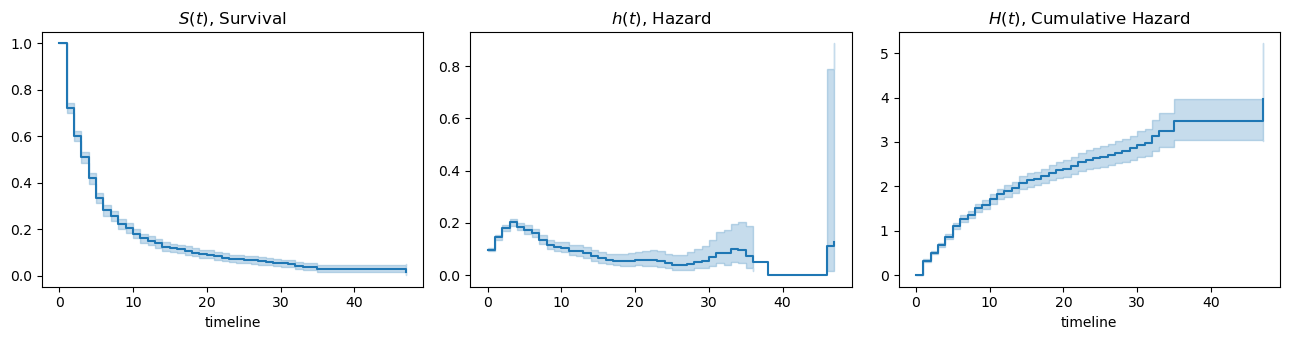

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(13, 3.5))

kmf.plot_survival_function(ax=ax[0])
naf.plot_hazard(bandwidth=3.0, ax=ax[1])
naf.plot_cumulative_hazard(ax=ax[2])

ax[0].legend().set_visible(False)
ax[1].legend().set_visible(False)
ax[2].legend().set_visible(False)

ax[0].set_title(rf'$S(t)$, Survival')
ax[1].set_title(rf'$h(t)$, Hazard')
ax[2].set_title(rf'$H(t)$, Cumulative Hazard')

plt.tight_layout()

To get the values from these functions, invoke the following methods and pass in a list of times for which you are interested.

- `kmf.survival_function_at_times()`
- `naf.hazard_at_times()`
- `naf.cumulative_hazard_at_times()`

## Estimating the functions by hand

Now let's estimate the functions manually by hand. Note that the functions only concern the variable $T$. Also, again, we can calculate the value of one function from another.

In [4]:
import pandas as pd
import numpy as np

def get_functions(T, E=None):
    if E is not None:
        PDF = pd.concat([
            T[E == 1].value_counts().sort_index() / T[E==1].value_counts().sum(),
            pd.Series([0], name='duration')
        ]).sort_index()
    else:
        PDF = pd.concat([
            T.value_counts().sort_index() / T.value_counts().sum(),
            pd.Series([0], name='duration')
        ]).sort_index()

    CDF = PDF.cumsum()
    CCDF = np.abs(1 - CDF)
    HF = PDF / CCDF
    CHF = np.abs(-np.log(CCDF))
    
    return pd.DataFrame({
        'f(t)': PDF,
        'F(t)': CDF,
        'S(t)': CCDF,
        'h(t)': [v if v <= 1.0 else np.nan for v in HF],
        'H(t)': [v if not np.isinf(v) else np.nan for v in CHF]
    })

def plot_functions(T, F):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3.0))
    axes = np.ravel(axes)

    T.plot(kind='kde', ax=axes[0])
    axes[0].set_title(rf'$f(t)$')
    
    for c, ax in zip(F.columns[1:], axes[1:]):
        F[c].plot(kind='line', ax=ax)
        ax.set_title(rf'${c}$')

    plt.tight_layout()

Here are the plots.

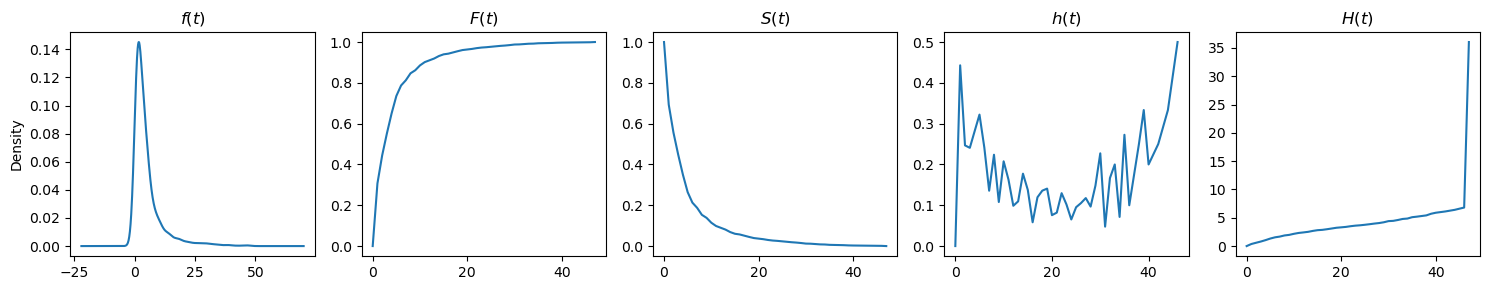

In [5]:
df = load_dd()

T, E = df['duration'], df['observed']

plot_functions(T, get_functions(T))

Here are some more visualizations from different [data](https://lifelines.readthedocs.io/en/latest/lifelines.datasets.html).

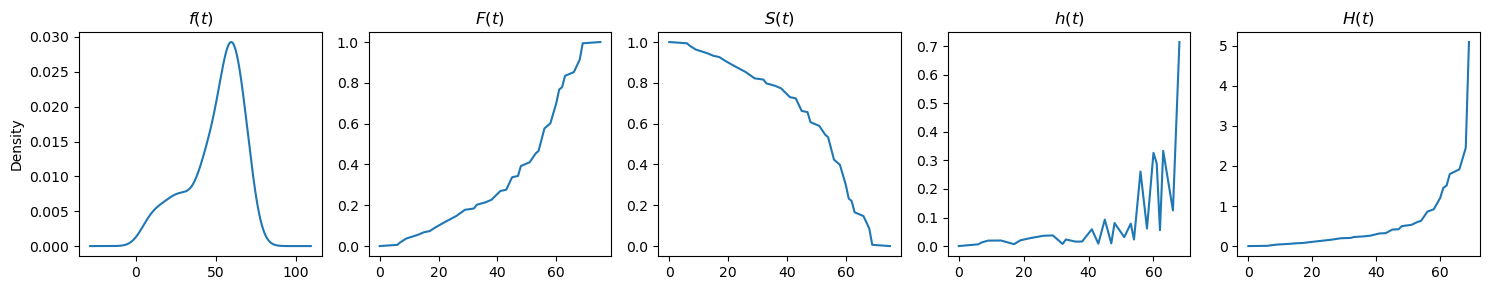

In [6]:
from lifelines.datasets import load_waltons

df = load_waltons()
T, E = df['T'], df['E']

plot_functions(T, get_functions(T))

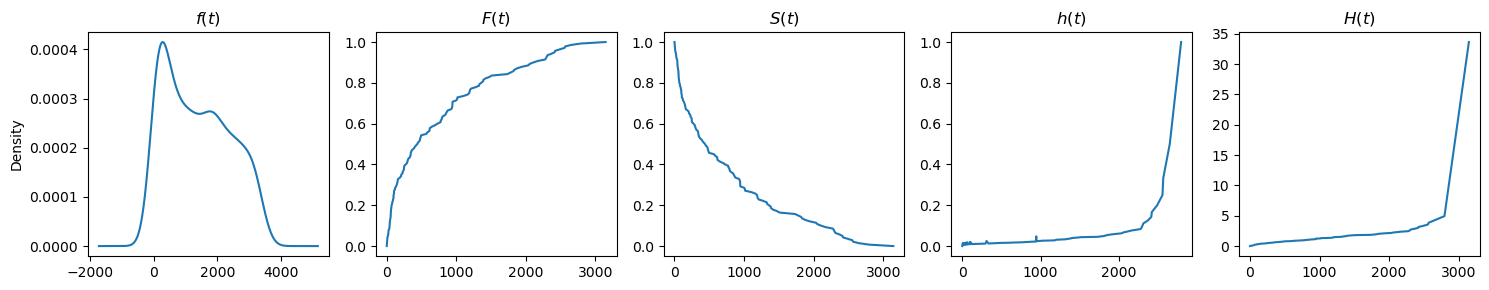

In [7]:
from lifelines.datasets import load_kidney_transplant

df = load_kidney_transplant()
T, E = df['time'], df['death']

plot_functions(T, get_functions(T, E))